In [1]:
from __future__ import division, print_function
import sys, os, glob, gc
import numpy as np
from astropy.table import Table, vstack
import fitsio
import matplotlib.pyplot as plt

from desitarget.targets import desi_mask

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [45]:
dr = 'dr8.0'

cat_list = glob.glob('/global/project/projectdirs/desi/target/catalogs/dr8/0.31.1/targets/main/resolve/*.fits')
print(len(cat_list))

index = 0
while index<len(cat_list):
    # print('wscnd' in cat_list[index])
    if 'wscnd' in cat_list[index]:
        print(cat_list[index])
        cat_list.pop(index)
    else:
        index += 1

print(len(cat_list))

cat_stack = []
for index in range(len(cat_list)):
# for index in range(10):
    cat_chunk = fitsio.read(cat_list[index], columns=['RA', 'DEC', 'DESI_TARGET', 'MASKBITS', 'MORPHTYPE', 'FLUX_G', 'MW_TRANSMISSION_G', 'FRACDEV', 'SHAPEEXP_R', 'SHAPEEXP_E1', 'SHAPEEXP_E2', 'SHAPEDEV_E1', 'SHAPEDEV_E2'])
    mask = (cat_chunk['DESI_TARGET'] & desi_mask['ELG'])!=0
    mask &= (cat_chunk['RA']>100) & (cat_chunk['RA']<280) & (cat_chunk['DEC']<32.375) & (cat_chunk['DEC']>-20)
    if np.sum(mask)>0:
        cat_chunk = cat_chunk[mask]
        cat_chunk = Table(cat_chunk)
        cat_stack.append(cat_chunk)
        # print(len(cat_chunk))
        
    # clear cache
    gc.collect()
    
cat = vstack(cat_stack)
print(len(cat))

cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G']/cat['MW_TRANSMISSION_G'])

32
32
14094848


In [7]:
# # Select the southern footprint
# mask = cat['DEC']<32.375
# cat = cat[mask]
# print(len(cat))

# # mask = (cat['RA']>100) & (cat['RA']<280)
# # mask &= cat['DEC']>-25
# mask = cat['DEC']>-20
# cat = cat[mask]
# print(len(cat))

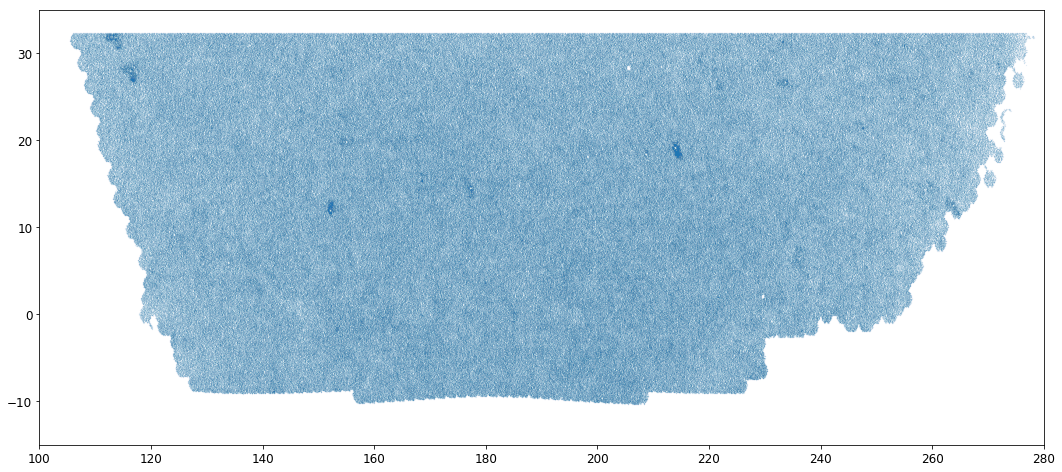

In [8]:
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][::10], cat['DEC'][::10], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

13843522


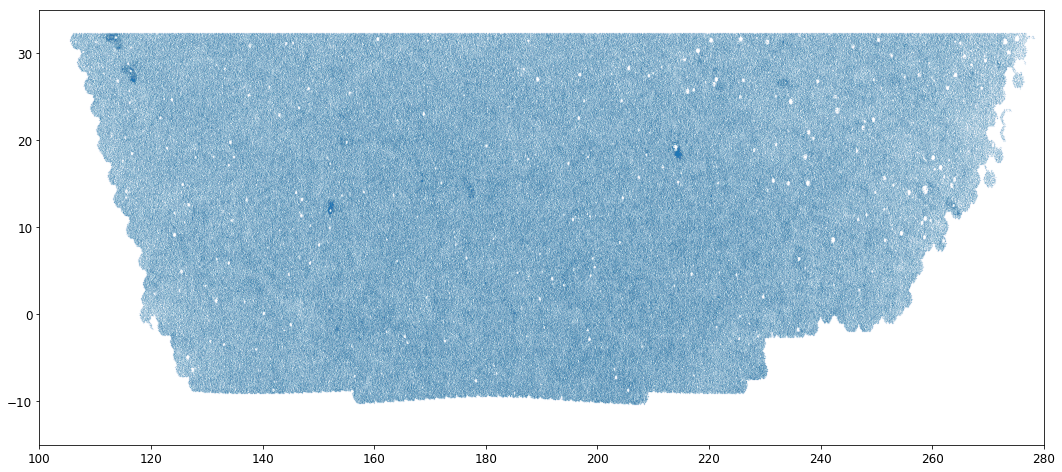

In [9]:
# Clean up
mask = cat['MASKBITS']==0
cat = cat[mask]
print(len(cat))

plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][::10], cat['DEC'][::10], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

--------

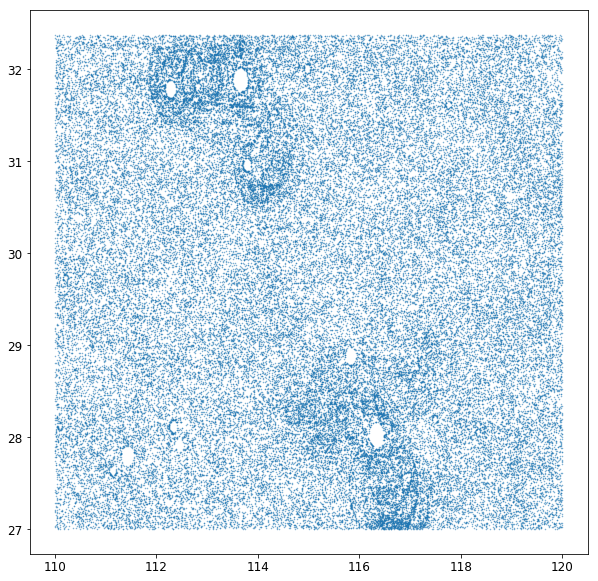

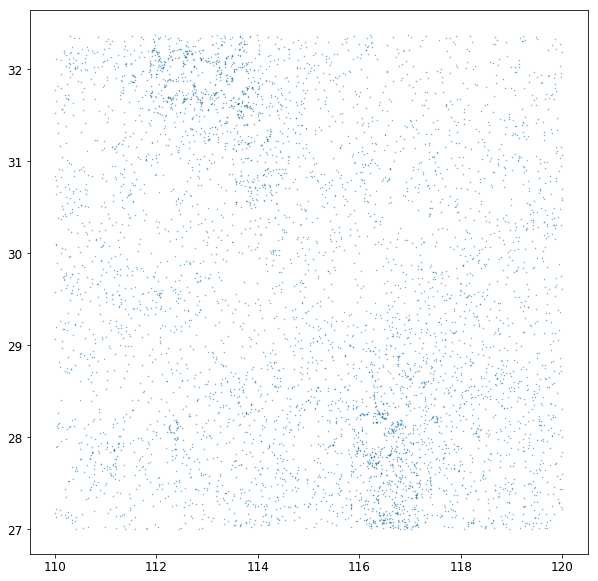

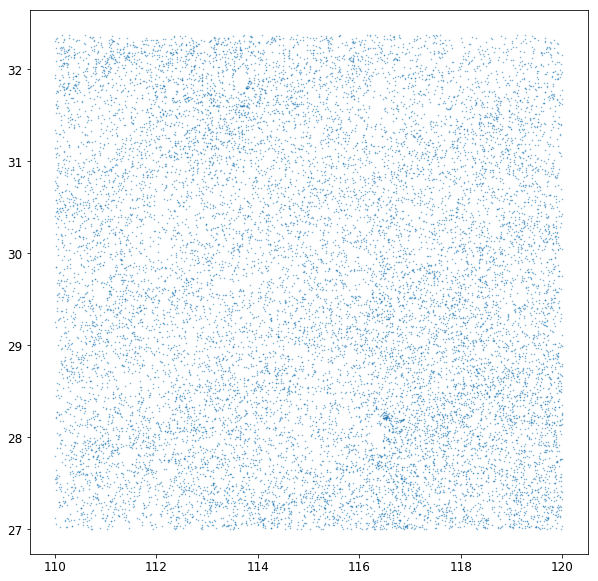

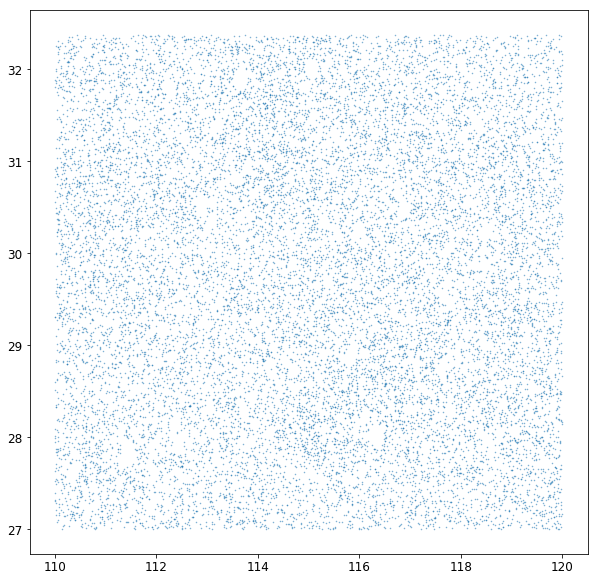

In [70]:
mask = (cat['RA']>110) & (cat['RA']<120) & (cat['DEC']>27) & (cat['DEC']<34)
mask_rex = mask & (cat['MORPHTYPE']=='REX ')
mask_exp = mask & (cat['MORPHTYPE']=='EXP ')
mask_psf = mask & (cat['MORPHTYPE']=='PSF ')
mask_dev = mask & (cat['MORPHTYPE']=='DEV ')

# Check two hotspots
plt.figure(figsize=(10, 10))
plt.plot(cat['RA'][mask_rex], cat['DEC'][mask_rex], '.', markersize=1, alpha=0.6)
# plt.plot(cat['RA'][mask_dev], cat['DEC'][mask_dev], '.', markersize=1, alpha=0.6)
plt.show()

# Check two hotspots
plt.figure(figsize=(10, 10))
plt.plot(cat['RA'][mask_dev], cat['DEC'][mask_dev], '.', markersize=1, alpha=0.6)
plt.show()

# Check two hotspots
plt.figure(figsize=(10, 10))
plt.plot(cat['RA'][mask_exp], cat['DEC'][mask_exp], '.', markersize=1, alpha=0.6)
plt.show()

# Check two hotspots
plt.figure(figsize=(10, 10))
plt.plot(cat['RA'][mask_psf], cat['DEC'][mask_psf], '.', markersize=1, alpha=0.6)
plt.show()

In [70]:
# # Check two hotspots
# plt.figure(figsize=(18, 8))
# plt.plot(cat['RA'][::30], cat['DEC'][::30], '.', markersize=0.2, alpha=0.4)
# plt.plot(116, 28, 'r.', ms=10)
# plt.plot(113.6538, 31.8949, 'r.', ms=10)
# plt.axis([100, 280, -15, 35])
# plt.show()

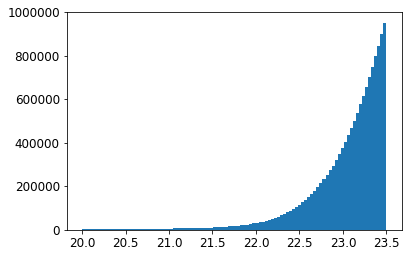

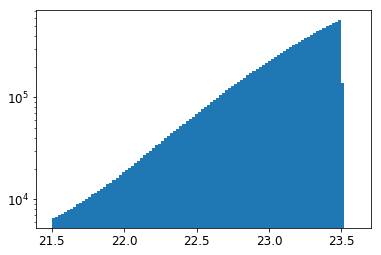

In [50]:
plt.hist(cat['gmag'], 100)
plt.show()

plt.hist(cat['gmag'], 100, range=(21.5, 23.6), log=True)
plt.show()

--------
## TYPE distribution

In [59]:
t = Table()
t['type'], t['counts'] = np.unique(cat['MORPHTYPE'], return_counts=True)
t['frac (%)'] = t['counts']/len(cat)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')

print('All ELGs:')
print(t)

All ELGs:
type  counts frac (%)
---- ------- --------
COMP    3470      0.0
DEV   482547      3.5
PSF  1752414     12.7
EXP  2207243     15.9
REX  9397848     67.9


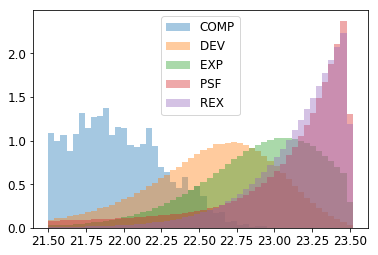

In [64]:
types = np.unique(cat['MORPHTYPE'])
for index in range(len(types)):
    mask = cat['MORPHTYPE']==types[index]
    if np.sum(mask)==0:
        continue
    plt.hist(cat['gmag'][mask], 50, range=(21.5, 23.52), log=False, alpha=0.4, density=True, label=types[index])
plt.legend()
plt.show()

In [33]:
mask = (cat['gmag']>23.) & (cat['gmag']<23.5)

t = Table()
t['type'], t['counts'] = np.unique(cat['MORPHTYPE'][mask], return_counts=True)
t['frac (%)'] = t['counts']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')

print('ELGs with 23.0 < g < 23.5:')
print(t)

ELGs with 23.0 < g < 23.5:
type  counts frac (%)
---- ------- --------
DEV    75784      0.8
EXP   962173     10.4
PSF  1152772     12.5
REX  7052482     76.3


In [22]:
mask = (cat['gmag']>23.4) & (cat['gmag']<23.5)

t = Table()
t['type'], t['counts'] = np.unique(cat['MORPHTYPE'][mask], return_counts=True)
t['frac (%)'] = t['counts']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')

print('ELGs with 23.4 < g < 23.5:')
print(t)

ELGs with 23.4<g<23.5:
type  counts frac (%)
---- ------- --------
DEV     3744      0.1
EXP   140041      5.4
PSF   378733     14.7
REX  2052687     79.7


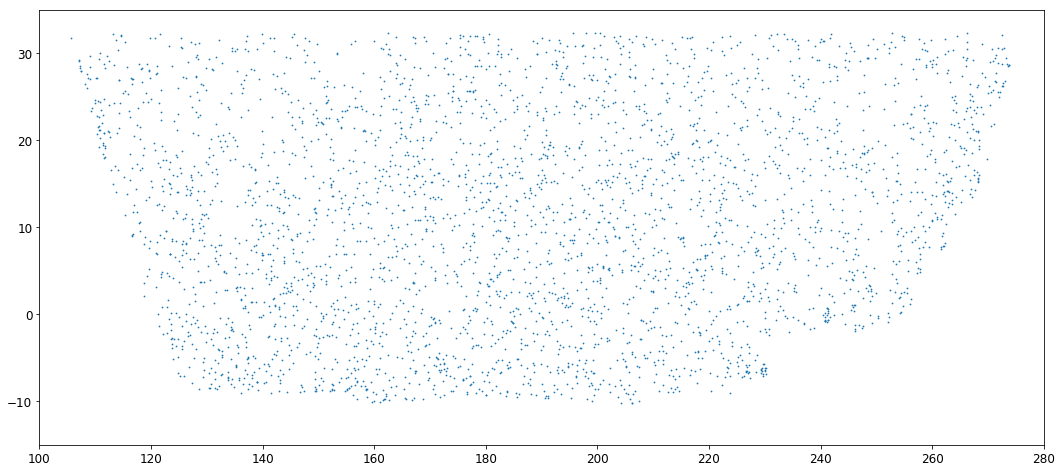

In [69]:
idx = np.where(cat['MORPHTYPE']=='COMP')[0]
if len(idx)>1e6:
    idx = np.random.choice(idx, size=int(1e6), replace=False)
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][idx], cat['DEC'][idx], '.', markersize=1.5, alpha=1)
plt.axis([100, 280, -15, 35])
plt.show()

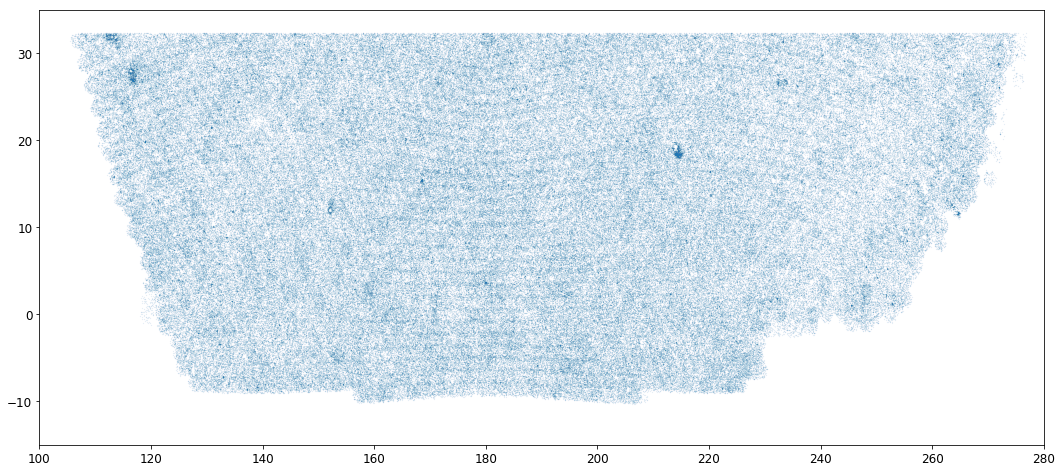

In [48]:
idx = np.where(cat['MORPHTYPE']=='DEV ')[0]
if len(idx)>1e6:
    idx = np.random.choice(idx, size=int(1e6), replace=False)
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][idx], cat['DEC'][idx], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

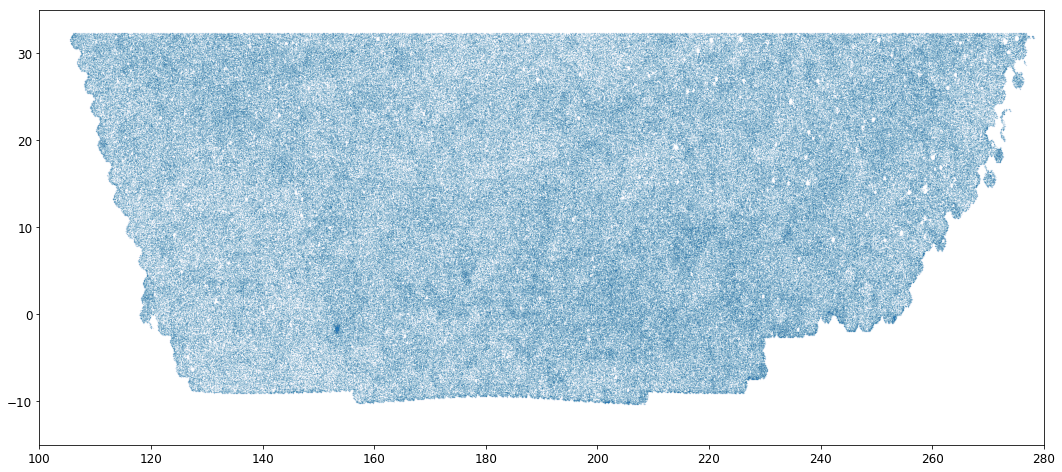

In [47]:
idx = np.where(cat['MORPHTYPE']=='PSF ')[0]
if len(idx)>1e6:
    idx = np.random.choice(idx, size=int(1e6), replace=False)
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][idx], cat['DEC'][idx], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

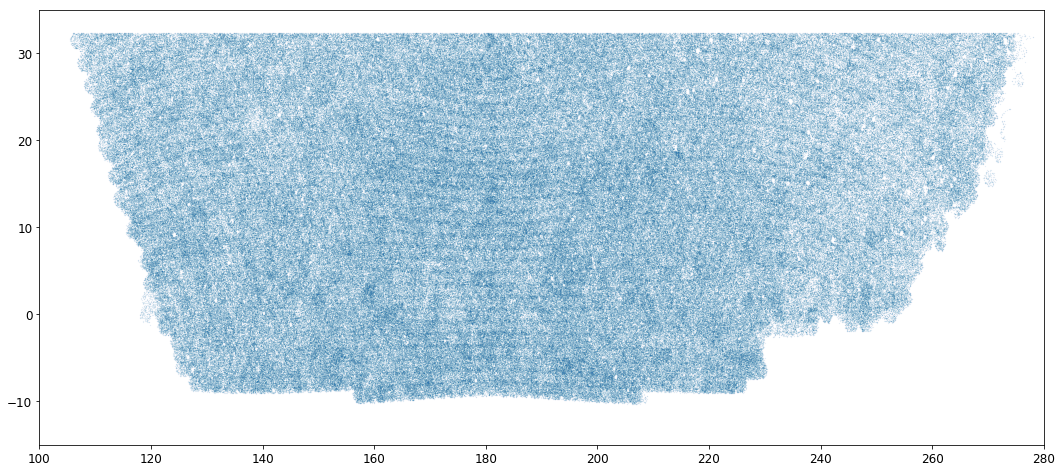

In [46]:
idx = np.where(cat['MORPHTYPE']=='EXP ')[0]
if len(idx)>1e6:
    idx = np.random.choice(idx, size=int(1e6), replace=False)
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][idx], cat['DEC'][idx], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

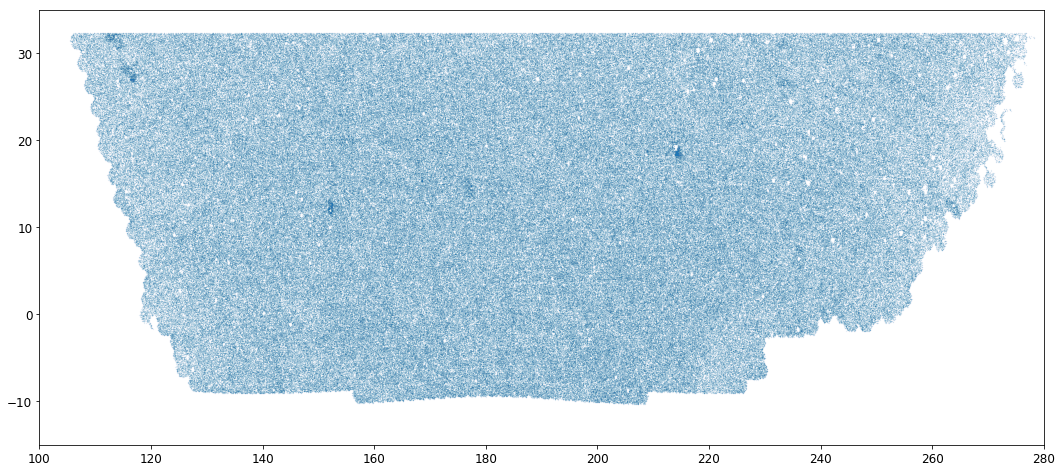

In [45]:
idx = np.where(cat['MORPHTYPE']=='REX ')[0]
if len(idx)>1e6:
    idx = np.random.choice(idx, size=int(1e6), replace=False)
plt.figure(figsize=(18, 8))
plt.plot(cat['RA'][idx], cat['DEC'][idx], '.', markersize=0.2, alpha=0.4)
plt.axis([100, 280, -15, 35])
plt.show()

-------
## How round are EXP objects?

In [4]:
# axis ratio
e = np.zeros(len(cat)) # ellipticity is zero for PSF and REX objects
mask = (cat['MORPHTYPE']=='EXP') | (cat['MORPHTYPE']=='EXP ')
e[mask] = (np.sqrt(cat['SHAPEEXP_E1']**2+cat['SHAPEEXP_E2']**2))[mask]
mask = (cat['MORPHTYPE']=='DEV') | (cat['MORPHTYPE']=='DEV ')
e[mask] = (np.sqrt(cat['SHAPEDEV_E1']**2+cat['SHAPEDEV_E2']**2))[mask]
mask = cat['MORPHTYPE']=='COMP'
e[mask] = ((1-cat['FRACDEV']) * np.sqrt(cat['SHAPEEXP_E1']**2+cat['SHAPEEXP_E2']**2) \
          + cat['FRACDEV'] * np.sqrt(cat['SHAPEDEV_E1']**2+cat['SHAPEDEV_E2']**2))[mask]
q = (1+e)/(1-e)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


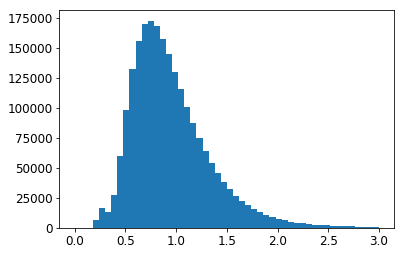

In [48]:
mask = cat['MORPHTYPE']=='EXP '
plt.hist(cat['SHAPEEXP_R'][mask], 50, range=(0, 3));

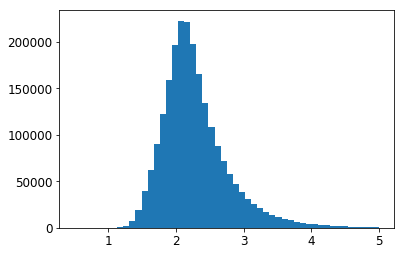

In [44]:
mask = cat['MORPHTYPE']=='EXP '
plt.hist(q[mask], 50, range=(0.5, 5));

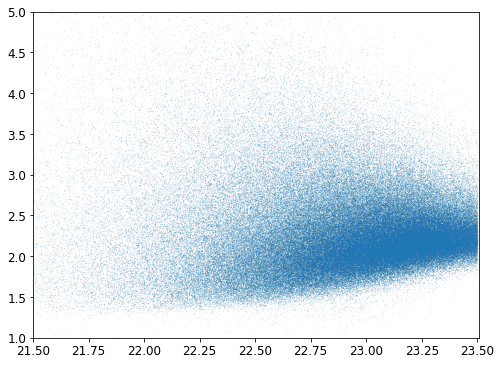

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(cat['gmag'][mask][::10], q[mask][::10], '.', ms=0.1)
plt.axis([21.5, 23.51, 1, 5])
plt.show()

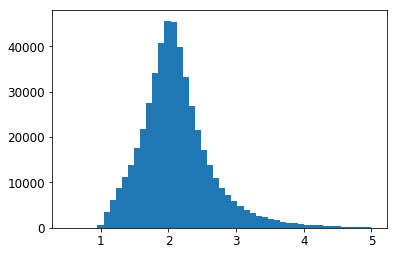

In [49]:
mask = cat['MORPHTYPE']=='DEV '
plt.hist(q[mask], 50, range=(0.5, 5));

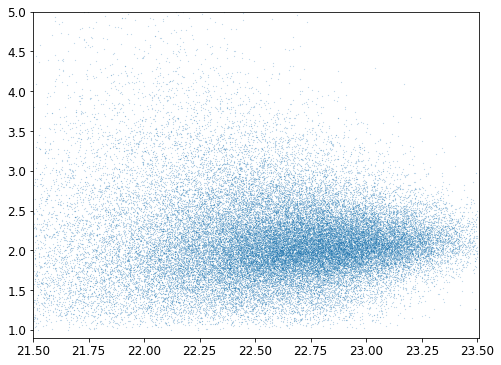

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(cat['gmag'][mask][::10], q[mask][::10], '.', ms=0.2)
plt.axis([21.5, 23.51, 0.9, 5])
plt.show()

__Visual inspections to make sure that the q values make sense__

In [29]:
# mask = (cat['gmag']>22) & (cat['gmag']<22.1)
# mask &= (cat['MORPHTYPE']=='REX ')
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=200, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg3.txt', format='ascii.no_header')

# mask = (cat['gmag']>22) & (cat['gmag']<22.1)
# mask &= (cat['MORPHTYPE']=='EXP ')
# mask &= (q<1.5)
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=200, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg1.txt', format='ascii.no_header')

# mask = (cat['gmag']>22) & (cat['gmag']<22.1)
# mask &= (cat['MORPHTYPE']=='EXP ')
# mask &= (q>3.) & (q<3.5)
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=200, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg2.txt', format='ascii.no_header')

In [31]:
# # ELGs in the HSC footprint
# mask = (cat['RA']>128) & (cat['RA']<153) & (cat['DEC']>-2.0) & (cat['DEC']<1.8)
# # mask &= (cat['MORPHTYPE']=='REX ')
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=200, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg_hsc.txt', format='ascii.no_header')

# # EXP ELGs in the HSC footprint
# mask = (cat['RA']>128) & (cat['RA']<153) & (cat['DEC']>-2.0) & (cat['DEC']<1.8)
# # mask &= (cat['gmag']>22) & (cat['gmag']<22.3)
# mask &= (cat['MORPHTYPE']=='EXP ')
# # mask &= (q>3.)
# print(np.sum(mask))
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=100, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg_hsc_exp.txt', format='ascii.no_header')

# # Elongated EXP ELGs in the HSC footprint
# mask = (cat['RA']>128) & (cat['RA']<153) & (cat['DEC']>-2.0) & (cat['DEC']<1.8)
# mask &= (cat['gmag']>22) & (cat['gmag']<22.3)
# mask &= (cat['MORPHTYPE']=='EXP ')
# mask &= (q>3.)
# print(np.sum(mask))
# idx = np.where(mask)[0]
# idx = np.random.choice(idx, size=100, replace=False)
# t = Table()
# t['RA'] = cat['RA'][idx]
# t['DEC'] = cat['DEC'][idx]
# t.write('/global/u2/r/rongpu/visual_inspection_elg_hsc_elliptical.txt', format='ascii.no_header')

In [54]:
# DEV ELGs in the HSC footprint
mask = (cat['RA']>128) & (cat['RA']<153) & (cat['DEC']>-2.0) & (cat['DEC']<1.8)
# mask &= (cat['gmag']>22) & (cat['gmag']<22.3)
mask &= (cat['MORPHTYPE']=='DEV ')
# mask &= (q>3.)
print(np.sum(mask))
idx = np.where(mask)[0]
idx = np.random.choice(idx, size=100, replace=False)
t = Table()
t['RA'] = cat['RA'][idx]
t['DEC'] = cat['DEC'][idx]
t.write('/global/u2/r/rongpu/visual_inspection_elg_hsc_dev.txt', format='ascii.no_header')

8020
